In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RAND = 10

# Импорт данных

In [155]:
df_items = pd.read_csv('C:/Users/Oktyabrina/Desktop/webscraper/product.csv')
df_items = df_items.drop(['nmFeedbacks','rating','root','optionId'], axis=1)
df_review = pd.read_csv('C:/Users/Oktyabrina/Desktop/webscraper/review.csv')
df_review = df_review.merge(df_items, left_on='Артикул', right_on='id')
df_review = df_review.drop(['id'], axis=1)

In [156]:
df_review = df_review.rename(columns={'brand':'Бренд','name':'Наименование','feedbacks':'Кол-во оценок',
                                      'reviewRating':'Общая оценка товара','basic':'Текущая цена до скидки','product':'Текущая цена после скидки',})
df_review.head(5)

,Автор,Статус заказа,Дата отзыва,Кол-во звезд,Текст отзыва,Артикул,Бренд,Наименование,Кол-во оценок,Общая оценка товара,Текущая цена до скидки,Текущая цена после скидки
0,Покупатель Wildberries,Выкупили,"Сегодня, 15:26",star5,Достоинства:Просто понравилась.,24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0
1,Ольга,Выкупили,"Сегодня, 15:16",star5,Хорошая,24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0
2,Светлана,Выкупили,"07 июля, 20:44",star5,"Достоинства:Давно пользуемся этой пастой, очен...",24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0
3,Татьяна,Выкупили,"07 июля, 13:07",star5,Достоинства:Хорошая паста,24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0
4,Марина,Выкупили,"07 июля, 06:34",star5,Достоинства:Хорошая зубная паста.. Посоветовал...,24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0


In [157]:
df_review = df_review.iloc[1:]

**Дату отзывов необходимо преобразовать в нормальную дату**

На сайте Вайлдбериз у отзывов, которые были оставлены вчера-сегодня, вместо даты пишут "Вчера" или "Сегодня"

In [158]:
date_dict = {
    'Сегодня': '09 июля',
    'Вчера': '08 июля'
}

for old_value,new_value in date_dict.items():
    df_review['Дата отзыва']=df_review['Дата отзыва'].str.replace(old_value,new_value, regex=True)


In [159]:
df_review[['date_temp','time']] = df_review['Дата отзыва'].str.replace(' • Дополнен','').str.split(',', expand=True)
df_review[['day','month','year']]=df_review['date_temp'].str.split(expand=True)
df_review['year']=df_review['year'].fillna('2025')

Названия месяцев написаны на русском со склонением. Необходимо вместо них подставить номер месяца

In [160]:
month_dict = {'января':'01',
              'февраля':'02',
              'марта':'03',
              'апреля':'04',
              'мая':'05',
              'июня':'06',
              'июля':'07',
              'августа':'08',
              'сентября':'09',
              'октября':'10',
              'ноября':'11',
              'декабря':'12'}
for old_value,new_value in month_dict.items():
    df_review['month']=df_review['month'].str.replace(old_value,new_value, regex=False)

df_review['Дата'] = pd.to_datetime(
    df_review['day']+'.'+df_review['month']+'.'+df_review['year']+df_review['time'],
    format="%d.%m.%Y %H:%M"
)

In [161]:
df_review.head(5)

,Автор,Статус заказа,Дата отзыва,Кол-во звезд,Текст отзыва,Артикул,Бренд,Наименование,Кол-во оценок,Общая оценка товара,Текущая цена до скидки,Текущая цена после скидки,date_temp,time,day,month,year,Дата
1,Ольга,Выкупили,"09 июля, 15:16",star5,Хорошая,24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0,09 июля,15:16,09,07,2025,2025-07-09 15:16:00
2,Светлана,Выкупили,"07 июля, 20:44",star5,"Достоинства:Давно пользуемся этой пастой, очен...",24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0,07 июля,20:44,07,07,2025,2025-07-07 20:44:00
3,Татьяна,Выкупили,"07 июля, 13:07",star5,Достоинства:Хорошая паста,24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0,07 июля,13:07,07,07,2025,2025-07-07 13:07:00
4,Марина,Выкупили,"07 июля, 06:34",star5,Достоинства:Хорошая зубная паста.. Посоветовал...,24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0,07 июля,06:34,07,07,2025,2025-07-07 06:34:00
5,Василина,Выкупили,"06 июля, 20:45",star5,Достоинства:Действительно помогаетКомментарий:...,24716555.0,Асепта,Зубная паста от кровоточивости десен ASEPTA Ac...,8112,4.9,509.0,249.0,06 июля,20:45,06,07,2025,2025-07-06 20:45:00


Необходимо удалить все лишние столбцы с датами отзыва и оставить только обработанный и преобразованный в datetime формат

In [162]:
df_review = df_review.drop(['Дата отзыва','date_temp','time','day','month','year'], axis=1)

Из столбца Кол-во звезд удаляем слово star, чтобы в столбце остались только числовые значения

In [163]:
df_review['Кол-во звезд']=df_review['Кол-во звезд'].str.replace('star','')

Кол-во пустых значений в столбцах

In [164]:
df_review.isna().sum()

Автор                         0
Статус заказа                91
Кол-во звезд                  0
Текст отзыва                  4
Артикул                       0
Бренд                         0
Наименование                  0
Кол-во оценок                 0
Общая оценка товара           0
Текущая цена до скидки        0
Текущая цена после скидки     0
Дата                          0
dtype: int64

У столбца Статус заказа очень много пустых значения, пустые ячейки заполняем значением Неизвестно


In [165]:
df_review['Статус заказа']=df_review['Статус заказа'].fillna('Неизвестно')

В столбце Текст отзыва тоже есть пустые значения, необходимо заполнить значение Пусто

In [166]:
df_review['Текст отзыва']=df_review['Текст отзыва'].fillna('Пусто')

Необходимо у столбца Кол-во звезд задать числовой тип

In [167]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 1 to 644
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Автор                      644 non-null    object        
 1   Статус заказа              644 non-null    object        
 2   Кол-во звезд               644 non-null    object        
 3   Текст отзыва               644 non-null    object        
 4   Артикул                    644 non-null    float64       
 5   Бренд                      644 non-null    object        
 6   Наименование               644 non-null    object        
 7   Кол-во оценок              644 non-null    int64         
 8   Общая оценка товара        644 non-null    float64       
 9   Текущая цена до скидки     644 non-null    float64       
 10  Текущая цена после скидки  644 non-null    float64       
 11  Дата                       644 non-null    datetime64[ns]
dtypes: datet

In [168]:
print(f"Уникальные значения столбца Кол-во звезд: {df_review['Кол-во звезд'].unique()}")

Уникальные значения столбца Кол-во звезд: ['5' '4' '3' '1' '2']


In [169]:
df_review=df_review.astype({'Кол-во звезд': int
                            })

Размер датасета

In [170]:
df_review.shape

(644, 12)

У столбца автор очень мало уникальных значений. У даты скорее всего из-за времени

In [171]:
df_review.nunique()

Автор                        148
Статус заказа                  3
Кол-во звезд                   5
Текст отзыва                 622
Артикул                       15
Бренд                          2
Наименование                  14
Кол-во оценок                 15
Общая оценка товара            8
Текущая цена до скидки        15
Текущая цена после скидки     15
Дата                         643
dtype: int64

Очень много анонимных отзывов

In [172]:
df_review['Автор'].value_counts(ascending=True)

Автор
Патимат                    1
т                          1
Кира                       1
Деметра                    1
Никита                     1
                          ..
Наталья                   29
Ольга                     38
Елена                     41
Татьяна                   50
Покупатель Wildberries    85
Name: count, Length: 148, dtype: int64

Если при расчете кол-ва уникальных значений столбца Дата смотреть только на дату, то кол-во будет меньше

In [173]:
df_review['Дата'].dt.date.nunique()

269

Основная описательная статистика
Для просмотра числовых данных, надо исключить Артикул

In [174]:
df_review.loc[:,df_review.columns!='Артикул'].describe()

,Кол-во звезд,Кол-во оценок,Общая оценка товара,Текущая цена до скидки,Текущая цена после скидки,Дата
count,644.000000,644.000000,644.000000,644.000000,644.000000,644
mean,4.582298,4659.723602,4.803571,669.363354,396.467391,2025-02-17 13:43:22.639751424
min,1.000000,1.000000,3.700000,475.000000,249.000000,2022-09-07 22:21:00
25%,5.000000,4705.000000,4.900000,509.000000,249.000000,2024-12-30 08:00:45
50%,5.000000,4705.000000,4.900000,654.000000,348.000000,2025-03-05 04:42:30
75%,5.000000,8112.000000,4.900000,654.000000,348.000000,2025-05-06 16:19:30
max,5.000000,8112.000000,5.000000,2880.000000,1969.000000,2025-07-09 15:16:00
std,1.045347,2780.473389,0.279195,311.804533,246.216421,NaN


- Нет выбросов. Лушче Кол-во звезд и дату смотреть как нечисловые данные

Оценка 5 чаще всего встречается

In [175]:
df_review['Кол-во звезд'].astype(str).describe()

count     644
unique      5
top         5
freq      528
Name: Кол-во звезд, dtype: object

28 апреля 2025 было больше всего отзывов

In [176]:
df_review['Дата'].dt.date.describe()

count            644
unique           269
top       2025-04-28
freq               8
Name: Дата, dtype: object

Много анонимных отзывов. Чаще всего отзывы оставляют покупатели, которые выкупили товар

In [177]:
df_review.describe(include=["object", "bool"])

,Автор,Статус заказа,Текст отзыва,Бренд,Наименование
count,644,644,644,644,644
unique,148,3,622,2,14
top,Покупатель Wildberries,Выкупили,Достоинства:Хороший ополаскиватель,Асепта,Ополаскиватель для рта ASEPTA от кровоточивост...
freq,85,533,6,529,330


# EDA

Гипотезы:
1. Чем выше оценка, тем чаще в отзыве чаще встречаются слова "хорошо" "отлично"
2. Чем ниже оценка, тем чаще в отзыве чаще встречаются слова "плохо" "ужасно"


Гипотеза 1. Чем выше оценка, тем чаще в отзыве чаще встречаются слова "хорошо" "отлично"

In [178]:
df_review['Текст отзыва']=df_review['Текст отзыва'].str.lower()
df_review['Have_positive_words'] = df_review['Текст отзыва'].str.contains("хорош|отличн", regex=True)

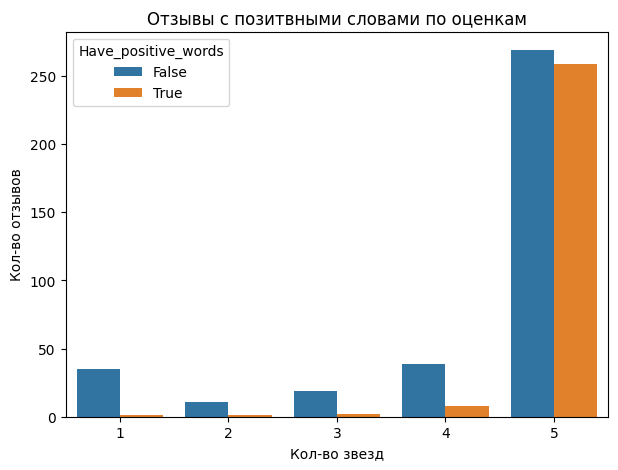

In [179]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_review, x='Кол-во звезд', hue='Have_positive_words')
plt.ylabel('Кол-во отзывов')
plt.title('Отзывы с позитвными словами по оценкам')
plt.show()

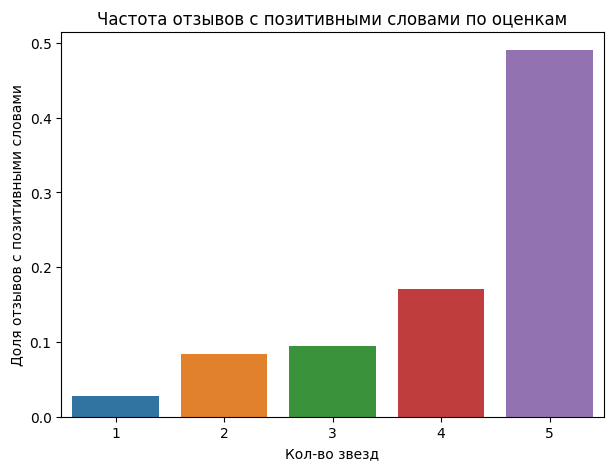

In [180]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_review, x='Кол-во звезд', y='Have_positive_words', estimator='mean', errorbar=None
)
plt.ylabel('Доля отзывов с позитивными словами')
plt.title('Частота отзывов с позитивными словами по оценкам')
plt.show()

- по графикам видно, что отзывы со словами "хорошо" или "отлично" встречаются чаще всего у отзывов с высокой оценкой

Гипотеза 2. Чем ниже оценка, тем чаще в отзыве чаще встречаются слова "плохо" "ужасно"

In [181]:
df_review['Have_negative_words'] = df_review['Текст отзыва'].str.contains("плох|ужасн", regex=True)

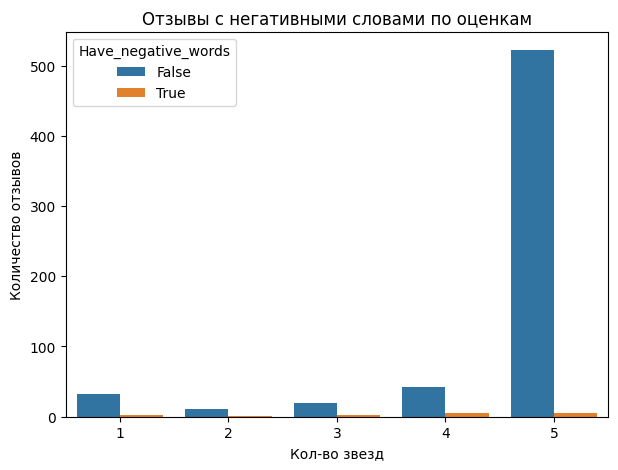

In [182]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_review, x='Кол-во звезд', hue='Have_negative_words')
plt.ylabel('Количество отзывов')
plt.title('Отзывы с негативными словами по оценкам')
plt.show()

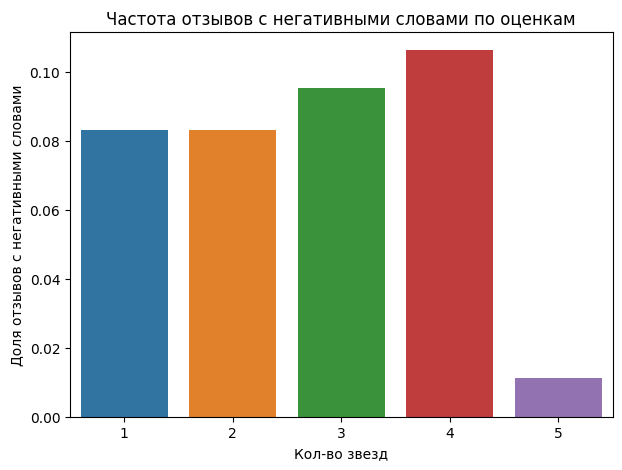

In [183]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_review, x='Кол-во звезд', y='Have_negative_words', estimator='mean', errorbar=None
)
plt.ylabel('Доля отзывов с негативными словами')
plt.title('Частота отзывов с негативными словами по оценкам')
plt.show()

- Гипотеза о том, что в отзывах с низкой оценкой чаще встречаются негативные слова - не подтвердилась